In [1]:
# Shishir Khanal
# 06-01-2025
# Data analysis for Satisfaction and Loyalty Patterns

In [2]:
import kagglehub
import pandas as pd
import os

# Download latest version (code obtained from: https://www.kaggle.com/datasets/rabieelkharoua/predict-restaurant-customer-satisfaction-dataset?resource=download)
path = kagglehub.dataset_download("rabieelkharoua/predict-restaurant-customer-satisfaction-dataset")
print("Path to dataset files:", path)

full_path = os.path.join(path, "restaurant_customer_satisfaction.csv")
df = pd.read_csv(full_path)

Path to dataset files: /home/shishir/.cache/kagglehub/datasets/rabieelkharoua/predict-restaurant-customer-satisfaction-dataset/versions/1


In [4]:
#Comparison of High Satisfaction and Loyalty ProgramMember

from scipy.stats import chi2_contingency
import numpy as np

crosstab = pd.crosstab(df['HighSatisfaction'], df['LoyaltyProgramMember'])
print(crosstab)

chi2, p_value, dof, expected = chi2_contingency(crosstab)

n = len(df)
rows, cols = crosstab.shape
#Cramers V
effect_size = np.sqrt(chi2 / (n * min(rows-1, cols-1)))

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Dof: {dof}")
print(f"Effect size: {effect_size}")

LoyaltyProgramMember    0    1
HighSatisfaction              
0                     717  582
1                      63  138
Chi-square statistic: 38.728687718510535
P-value: 4.869986275017778e-10
Dof: 1
Effect size: 0.16068330699134148


In [14]:
#Comparison of Loyalty, Online Reservation and Dine In

from scipy.stats import chi2_contingency
import numpy as np

crosstab_online = pd.crosstab(df['OnlineReservation'], df['LoyaltyProgramMember'])
print(crosstab_online)

chi2_online , p_value_online , dof_online , expected_online  = chi2_contingency(crosstab_online)

n = len(df)
rows_online, cols_online = crosstab_online.shape
#Cramers V
effect_size_online = np.sqrt(chi2_online / (n * min(rows_online-1, cols_online-1)))

print(f"Chi-square statistic online: {chi2_online}")
print(f"P-value online: {p_value_online}")
print(f"Dof online: {dof_online}")
print(f"Effect size online: {effect_size_online}")
print('------------------------------------------------')
crosstab_delivery = pd.crosstab(df['DeliveryOrder'], df['LoyaltyProgramMember'])
print(crosstab_delivery)

chi2_delivery, p_value_delivery, dof_delivery, expected_delivery = chi2_contingency(crosstab_delivery)

rows_delivery, cols_delivery = crosstab_delivery.shape
#Cramers V
effect_size_delivery = np.sqrt(chi2_delivery / (n * min(rows_delivery-1, cols_delivery-1)))

print(f"Chi-square statistic delivery: {chi2_delivery}")
print(f"P-value delivery: {p_value_delivery}")
print(f"Dof delivery: {dof_delivery}")
print(f"Effect size delivery: {effect_size_delivery}")

LoyaltyProgramMember    0    1
OnlineReservation             
0                     556  499
1                     224  221
Chi-square statistic online: 0.6094420117397907
P-value online: 0.4349979799524174
Dof online: 1
Effect size online: 0.02015675257806162
------------------------------------------------
LoyaltyProgramMember    0    1
DeliveryOrder                 
0                     465  427
1                     315  293
Chi-square statistic delivery: 0.004826875703509743
P-value delivery: 0.9446109583828648
Dof delivery: 1
Effect size delivery: 0.0017938553831547187


In [50]:
#What categrorical variable relates to high satisfaction

categorical_vars = ['Gender', 'VisitFrequency', 'PreferredCuisine', 'TimeOfVisit', 'DiningOccasion', 'MealType', 'OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember']

for var in categorical_vars:
    print(f"High Satisfaction compared with {var}")
    crosstab = pd.crosstab(df[var], df['HighSatisfaction'], normalize='index') * 100
    #print(crosstab)
    high_satisfaction_percent = crosstab[1].round(1)
    print(high_satisfaction_percent.sort_values(ascending=False))
    n = len(df)
    chi2, p_val, dof, expected = chi2_contingency(crosstab)
    cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
    print(f"Chi-square: {chi2:.3f}, p-value: {p_val:.6f}, Cramér's V: {cramers_v:.3f}")
    print('-----------------------------------------------------------------')

High Satisfaction compared with Gender
Gender
Male      13.6
Female    13.2
Name: 1, dtype: float64
Chi-square: 0.000, p-value: 1.000000, Cramér's V: 0.000
-----------------------------------------------------------------
High Satisfaction compared with VisitFrequency
VisitFrequency
Weekly     20.5
Daily      15.0
Monthly     7.9
Rarely      6.4
Name: 1, dtype: float64
Chi-square: 11.728, p-value: 0.008377, Cramér's V: 0.088
-----------------------------------------------------------------
High Satisfaction compared with PreferredCuisine
PreferredCuisine
American    15.2
Indian      14.5
Chinese     13.5
Italian     12.3
Mexican     11.7
Name: 1, dtype: float64
Chi-square: 0.732, p-value: 0.947279, Cramér's V: 0.022
-----------------------------------------------------------------
High Satisfaction compared with TimeOfVisit
TimeOfVisit
Breakfast    14.2
Dinner       13.6
Lunch        12.4
Name: 1, dtype: float64
Chi-square: 0.158, p-value: 0.923922, Cramér's V: 0.010
------------------

In [49]:
#What numerical variable relates to high satisfaction
from scipy.stats import pearsonr, spearmanr

numerical_vars = ['Age', 'Income', 'AverageSpend', 'GroupSize', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']
for var in numerical_vars:
    print(f"High Satisfaction compared with {var}")
    high_sat = df[df['HighSatisfaction'] == 1][var]
    low_sat = df[df['HighSatisfaction'] == 0][var]
    print(f"High Satisfaction: Mean - {high_sat.mean():.2f}, Median - {high_sat.median():.2f}")
    print(f"Low Satisfaction: Mean - {low_sat.mean():.2f}, Median - {low_sat.median():.2f}")
    print(f"Difference in Means: {high_sat.mean() - low_sat.mean():.2f}")
    # Pearson correlation
    corr_pearson, p_pearson = pearsonr(df[var], df['HighSatisfaction'])           
    # Spearman correlation (better for ordinal/non-normal data)
    corr_spearman, p_spearman = spearmanr(df[var], df['HighSatisfaction'])
    
    print(f"Pearson Correlation corr:{corr_pearson} p-value: {p_pearson}")
    print(f"Spearman Correlation corr:{corr_spearman} p-value: {p_spearman}")
    print('-----------------------------------------------------------------')

High Satisfaction compared with Age
High Satisfaction: Mean - 45.18, Median - 46.00
Low Satisfaction: Mean - 43.62, Median - 44.00
Difference in Means: 1.56
Pearson Correlation corr:0.03554685764532872 p-value: 0.1688182196902083
Spearman Correlation corr:0.03577947813033441 p-value: 0.16604590396489674
-----------------------------------------------------------------
High Satisfaction compared with Income
High Satisfaction: Mean - 93869.66, Median - 98241.00
Low Satisfaction: Mean - 84692.10, Median - 84302.00
Difference in Means: 9177.57
Pearson Correlation corr:0.08190549007587944 p-value: 0.0014990007165250152
Spearman Correlation corr:0.08053417043518271 p-value: 0.0017990409886813876
-----------------------------------------------------------------
High Satisfaction compared with AverageSpend
High Satisfaction: Mean - 112.68, Median - 109.81
Low Satisfaction: Mean - 104.57, Median - 103.59
Difference in Means: 8.10
Pearson Correlation corr:0.05271609829509082 p-value: 0.041210772

P value ServiceRating and FoodRating is 0.8577870581547353
P value ServiceRating and AmbianceRating is 0.908343998661953
------------------------------------------------------
             Spearman Correlation Matrix


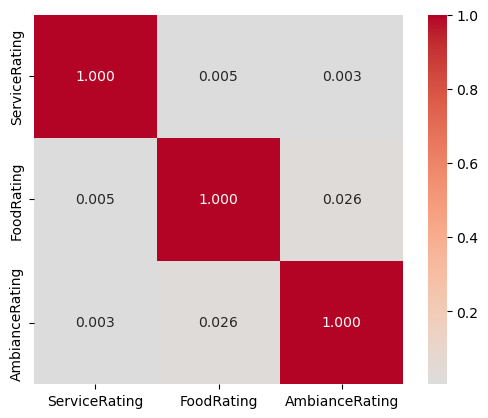

In [67]:
#Correlation between ratings data
import seaborn as sns

vars = ['ServiceRating', 'FoodRating', 'AmbianceRating']
spearman_corr = df[vars].corr(method='spearman')

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')

spearman_r1, spearman_p1 = spearmanr(df[vars[0]], df[vars[1]])
spearman_r2, spearman_p2 = spearmanr(df[vars[0]], df[vars[2]])
print(f"P value {vars[0]} and {vars[1]} is {spearman_p1}")
print(f"P value {vars[0]} and {vars[2]} is {spearman_p2}")
print('------------------------------------------------------')
print('             Spearman Correlation Matrix')
